In [2]:
%pip install fuzzywuzzy
#import relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import json
from fuzzywuzzy import process

Note: you may need to restart the kernel to use updated packages.


In [3]:
#read the data
df = pd.read_csv('C:/Users/DONKAMS/Downloads/Project_STA2017/NigeriaAutoInsurance_Vehicle (1).csv')
#check the data
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Benue,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Abuja Municipal,Abuja-Municipal,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Yaba,Benue,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Oshodi-Isolo,Car Classic,0


## This dataset seems to contain information relevant to insurance policies, with details about the insured individuals, their vehicles, policy specifics, and possibly some target variable for prediction or analysis.

### ID: Unique identifier for each policy holder.
### Policy Start Date: The date when the insurance policy begins.
### Policy End Date: The date when the insurance policy expires.
### Gender: Gender of the policy holder.
### Age: Age of the policy holder.
### First Transaction Date: Date of the policy holder's first transaction with the insurance company.
### No_Pol: Number of policies held by the individual.
### Car_Category: Category or type of the insured vehicle (e.g., SUV, sedan, truck, etc.).
### Subject_Car_Colour: Colour of the insured vehicle.
### Subject_Car_Make: Make or manufacturer of the insured vehicle (e.g., Toyota, Honda, etc.).
### LGA_Name: Local Government Area name.
### State: State of residence of the policy holder.
### ProductName: Type or name of the insurance product.
### target: Possibly a binary classification indicating whether the policy holder is a target for something specific (e.g., renewal, promotion, risk assessment, etc.).

### This appears to be a dataset related to insurance policies or perhaps automobile insurance.

In [4]:
##describe the data
df.describe(include = 'all')     #describe the data

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
count,2667,2667,2667,2667,2667.000000,2667,2667.000000,2667,2667,2667,2667,2667,2667,2667.000000
unique,2667,344,350,6,NaN,344,NaN,14,34,45,202,88,9,NaN
top,ID_00N7XT1,2010-02-26,2011-02-25,Male,NaN,2010-02-26,NaN,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,NaN
freq,1,30,29,1673,NaN,30,NaN,1507,1147,1377,332,1468,2210,NaN
mean,NaN,NaN,NaN,NaN,45.110611,NaN,1.499063,NaN,NaN,NaN,NaN,NaN,NaN,0.187477
std,NaN,NaN,NaN,NaN,18.732415,NaN,0.805725,NaN,NaN,NaN,NaN,NaN,NaN,0.390367
min,NaN,NaN,NaN,NaN,-27.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,36.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,42.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,51.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2667 non-null   object
 1   Policy Start Date       2667 non-null   object
 2   Policy End Date         2667 non-null   object
 3   Gender                  2667 non-null   object
 4   Age                     2667 non-null   int64 
 5   First Transaction Date  2667 non-null   object
 6   No_Pol                  2667 non-null   int64 
 7   Car_Category            2667 non-null   object
 8   Subject_Car_Colour      2667 non-null   object
 9   Subject_Car_Make        2667 non-null   object
 10  LGA_Name                2667 non-null   object
 11  State                   2667 non-null   object
 12  ProductName             2667 non-null   object
 13  target                  2667 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 291.8+ KB


In [6]:
#check the shape of the data
df.shape

(2667, 14)

### 2667 entries or instances of data, and each entry contains information across 14 different attributes or characteristics of a car insurance policy

In [7]:
#check the columns of the data
df.columns

Index(['ID', 'Policy Start Date', 'Policy End Date', 'Gender', 'Age',
       'First Transaction Date', 'No_Pol', 'Car_Category',
       'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State',
       'ProductName', 'target'],
      dtype='object')

# Data Cleaning and Preprocessing

In [8]:
#check the data types of the columns
df.dtypes

ID                        object
Policy Start Date         object
Policy End Date           object
Gender                    object
Age                        int64
First Transaction Date    object
No_Pol                     int64
Car_Category              object
Subject_Car_Colour        object
Subject_Car_Make          object
LGA_Name                  object
State                     object
ProductName               object
target                     int64
dtype: object

In [9]:
#check for missing values
df.isnull().sum()

ID                        0
Policy Start Date         0
Policy End Date           0
Gender                    0
Age                       0
First Transaction Date    0
No_Pol                    0
Car_Category              0
Subject_Car_Colour        0
Subject_Car_Make          0
LGA_Name                  0
State                     0
ProductName               0
target                    0
dtype: int64

### There is no missing value cases for the dataset

In [119]:
#check for duplicates
df.duplicated().sum()

0

#### No duplicated entry also, seems the dataset is pretty clean, but a quick check on the age column

In [10]:
#check for unique values
df.nunique()

ID                        2667
Policy Start Date          344
Policy End Date            350
Gender                       6
Age                         88
First Transaction Date     344
No_Pol                       7
Car_Category                14
Subject_Car_Colour          34
Subject_Car_Make            45
LGA_Name                   202
State                       88
ProductName                  9
target                       2
dtype: int64

In [11]:
#check the age column for extreme values
df['Age'].unique()

array([ 71,  30,  40,  41,  39,  47,  42,  37,  45,  52,  50,  44,  32,
        53, 120,  56,  26,  38,  43,  65,  46,  51,  58,  55,  34,  62,
        33,  49,  60,  67,  61,  64,  35,  28,  36,  10,  20,  54,  48,
        70,   7,  66,  63,  31,  57,  59,  19,  79,  73,   9,  12,  81,
        29,  78,  25,  -2,  89,  27,  72,  69,  84,  75,  76,   1,  68,
         6,   8,   5,  93,  13, -12,  83,  82,  80,  77,  74,  18, 320,
        17,   3,  85,   0,  22, -27,   2,   4,  24,  11], dtype=int64)

#### The age column in the dataset presents a diverse range of values, encompassing both negative figures (like -27 and -12) and exceedingly high ones (such as 320). This variety deviates significantly from the typical age range, suggesting potential anomalies or data entry errors. The inclusion of negative values and extremely high ages, which are highly improbable in real-world scenarios, indicates potential issues with data quality. Addressing these anomalies and errors will be crucial to ensure the accuracy and reliability of any subsequent analyses or modeling efforts involving this dataset's age-related information.

In [12]:
#apply a function that replace all values in the age column with their absolute values
df['Age'] = df['Age'].abs()

In [13]:
df['Age'].unique()

array([ 71,  30,  40,  41,  39,  47,  42,  37,  45,  52,  50,  44,  32,
        53, 120,  56,  26,  38,  43,  65,  46,  51,  58,  55,  34,  62,
        33,  49,  60,  67,  61,  64,  35,  28,  36,  10,  20,  54,  48,
        70,   7,  66,  63,  31,  57,  59,  19,  79,  73,   9,  12,  81,
        29,  78,  25,   2,  89,  27,  72,  69,  84,  75,  76,   1,  68,
         6,   8,   5,  93,  13,  83,  82,  80,  77,  74,  18, 320,  17,
         3,  85,   0,  22,   4,  24,  11], dtype=int64)

#### so only 320 is the extreme value, perhaps it's an error on the data entry end, 320 meaning 32

In [14]:
#replace the 320 values in the age column with the 32
df['Age'] = df['Age'].replace(320, 32)

#### Noticed that the Some LGA are wrongly placed in there respective states, e.g Badagry is not in Benue, This might hinder our analysis if continued, hence the need for restructuring

In [15]:
#load the json file and read it
with open('C:/Users/DONKAMS/Downloads/Project_STA2017/nigeria-state-and-lgas.json') as f:
    data = json.load(f)

In [16]:
file_path = 'C:/Users/DONKAMS/Downloads/Project_STA2017/nigeria-state-and-lgas.json'

try:
    with open(file_path) as f:
        data = json.load(f)
    # Proceed with using the 'data' variable containing the JSON content
except FileNotFoundError:
    print(f"File '{file_path}' not found.")
except PermissionError:
    print("Permission denied to read the file.")
except Exception as e:
    print(f"An error occurred: {e}")


In [17]:
data

[{'state': 'Adamawa',
  'alias': 'adamawa',
  'lgas': ['Demsa',
   'Fufure',
   'Ganye',
   'Gayuk',
   'Gombi',
   'Grie',
   'Hong',
   'Jada',
   'Larmurde',
   'Madagali',
   'Maiha',
   'Mayo Belwa',
   'Michika',
   'Mubi North',
   'Mubi South',
   'Numan',
   'Shelleng',
   'Song',
   'Toungo',
   'Yola North',
   'Yola South']},
 {'state': 'Akwa Ibom',
  'alias': 'akwa_ibom',
  'lgas': ['Abak',
   'Eastern Obolo',
   'Eket',
   'Esit Eket',
   'Essien Udim',
   'Etim Ekpo',
   'Etinan',
   'Ibeno',
   'Ibesikpo Asutan',
   'Ibiono-Ibom',
   'Ikot Abasi',
   'Ika',
   'Ikono',
   'Ikot Ekpene',
   'Ini',
   'Mkpat-Enin',
   'Itu',
   'Mbo',
   'Nsit-Atai',
   'Nsit-Ibom',
   'Nsit-Ubium',
   'Obot Akara',
   'Okobo',
   'Onna',
   'Oron',
   'Udung-Uko',
   'Ukanafun',
   'Oruk Anam',
   'Uruan',
   'Urue-Offong/Oruko',
   'Uyo']},
 {'state': 'Anambra',
  'alias': 'anambra',
  'lgas': ['Aguata',
   'Anambra East',
   'Anaocha',
   'Awka North',
   'Anambra West',
   'Awka South

In [18]:
# Load the data from the JSON file
with open('C:/Users/DONKAMS/Downloads/Project_STA2017/nigeria-state-and-lgas.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Define a function to map LGA_names in df to state_names in data and return the state_names as valuesin a new column
def map_lga_to_state(lga_name):
    for entry in data:
        if lga_name in entry.get('lgas', []):
            # Return the state name
            return entry.get('state')
        
# Map LGA names to states
df['State'] = df['LGA_Name'].apply(map_lga_to_state)


In [19]:
#check the data
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Abuja Municipal,None,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Yaba,None,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [20]:
#Provide a list of the LGA_Names that are not in the JSON file and there corresponding states in the original data
df[df['State'].isnull()]['LGA_Name'].unique()

array(['Abuja Municipal', 'Yaba', 'Okpe, Delta State', 'IbadanCentral',
       'Abeokuta', 'Lekki', 'Ibeju/Lekki', 'OGUN', 'Victoria Island',
       'Obia/Akpor', 'Surulere', 'GBAGADA', 'Central', 'Ebute-Metta',
       'Ibadan South West', 'ISHERI', 'Festac', 'Zaria ', 'ENUGU EAST',
       'Ajah', 'Ketu', 'Eti-Osa', 'Asokoro District', 'Ile-Oluji',
       'Port-Harcourt', 'Ifako-Ijaye ', 'Oshodi', 'Alagbado', 'Abuja',
       'Aboh-Mbaise', 'OGBA', 'Ilupeju', 'Calabar', 'AKUTE',
       'Warri Central', 'Ikoyi', 'Bekwara', 'Lagelu Ogbomosho North',
       'Ibadan South East', 'Isolo', 'Anthony Village', 'Maryland',
       'Ipaja', 'Lagos', 'MAGODO', 'Kaduna', 'Ibadan North West', 'OJOTA',
       'Nsit Ubium', 'Benin', 'Owerri West ', 'Warri', 'Minna',
       'Ogbmosho South', 'Asaba', 'Ile-Ife', 'Ojodu', 'ABULE EGBA',
       'OGUDU', 'Ovia SouthWest', 'OKOTA', 'Ajegunle,Lagos  State',
       'AREPO', 'IBADAN NORTH EAST', 'Marina', 'RIVERS', 'Dopemu',
       'OBANIKORO', 'ONDO', 'Orile-Ig

#### 36 states with FCT

In [ ]:
# Create a function to find similar substrings between LGA names
def find_similar_lga(lga_name, lga_list):
    match = process.extractOne(lga_name, lga_list)
    if match[1] > 80:
        return match[0]
    else:
        return None

# Create a reverse dictionary of LGAs and their corresponding states
lga_to_state = {}
for state, lgas in data.items():
    for lga in lgas:
        lga_to_state[lga] = state

# Create a list of LGAs from the dictionary keys
lga_list_dict = list(lga_to_state.keys())

# Iterate through each LGA_Name in df and find similar LGAs in the dictionary keys
for index, row in df.iterrows():
    similar_lga = find_similar_lga(row['LGA_Name'], lga_list_dict)
    if similar_lga:
        # Update the State column in df with the corresponding State from the dictionary
        corresponding_state = lga_to_state[similar_lga]
        df.at[index, 'State'] = corresponding_state

# Display the updated DataFrame 'df' with corrected 'State' values
print(df)

In [22]:
correct_version = {'Abuja Municipal': 'Municipal Area Council','Yaba': 'Apapa', 'Okpe, Delta State':'Okpe', 'IbadanCentral':'Ibadan East',
'Abeokuta': 'Abeokuta North', 'Lekki': 'Lagos Mainland', 'Ibeju/Lekki': 'Ojo', 'OGUN': 'Ifo', 'Victoria Island' : 'Eti-Osa',
'Obia/Akpor':'Burutu' , 'Surulere':'Surulere Lagos State' , 'GBAGADA':'Apapa', 'Central': 'Kano Municipal', 'Ebute-Metta':'Ikorodu',
'Ibadan South West': 'Ibadan South-West', 'ISHERI': 'Mushin', 'Festac':'Badagry', 'Zaria ':'Zaria', 'ENUGU EAST':'Enugu East',
'Ajah':'Agege', 'Ketu':'Kosofe', 'Eti-Osa':'Eti Osa', 'Asokoro District':'Gwagwalada', 'Ile-Oluji': 'Ila',
'Port-Harcourt':'Port Harcourt', 'Ifako-Ijaye ': 'Ifako-Ijaiye', 'Oshodi' :'Oshodi-Isolo', 'Alagbado':'Amuwa-Odofin', 'Abuja':'Abuja',
'Aboh-Mbaise': 'Bomadi', 'OGBA': 'Lagos Island', 'Ilupeju':'Mushin', 'Calabar': 'Calabar Municipal', 'AKUTE': 'Iseyin',
'Warri Central': 'Warri North', 'Ikoyi': 'Ikorodu', 'Bekwara':'Okpe', 'Lagelu Ogbomosho North':'Lagelu',
'Ibadan South East': 'Ibadan South-East', 'Isolo':'Lagos Island', 'Anthony Village': 'Lagos Island', 'Maryland': 'Lagos Island',
'Ipaja' :'Lagos Island', 'Lagos':'Lagos Island', 'MAGODO':'Lagos Island', 'Kaduna':'Kudan', 'Ibadan North West': 'Ibadan North-West', 'OJOTA':'Lagos Island',
'Nsit Ubium': 'Udi', 'Benin':'Oredo', 'Owerri West ':'Owerri West', 'Warri': 'Warri South', 'Minna': 'Tafa',
'Ogbmosho South':'Ogbomosho South', 'Asaba':'Sapele', 'Ile-Ife':'Ife Central', 'Ojodu':'Lagos Island', 'ABULE EGBA':'Lagos Island',
'OGUDU': 'Bende', 'Ovia SouthWest': 'Ovia South-West', 'OKOTA':'Ajeromi-Ifelodun', 'Ajegunle,Lagos  State':'Eti Osa' ,
'AREPO':'Awe', 'IBADAN NORTH EAST':'Ibadan North:East', 'Marina':'Lagos Highland', 'RIVERS': 'Yala', 'Dopemu':'Lagos Island',
'OBANIKORO': 'Owo', 'ONDO': 'Ondo East', 'Orile-Iganmu': 'Lagos Island', 'Nnewi':'Nnewi South', 'Oyi ': 'Oyi',
'Owerri-Municipal':'Isu', 'Akoka':'Lagos Island', 'AWOYAYA':'Lagos Island', 'Onitsha':'Burutu', 'Akwa Ibom': 'Uyo',
'IBA': 'Ose', ' IFAKO':'Lagos Island', 'Niger State': 'Lavun', 'Ilesha': 'Ila', 'AJAO ESTATE':'Lagos Island','Ekiti-East':'Ijero', 'Ikeja G.R.A':'Lagos Island', 'Ikotun': 'Lagos Island', 'AKOKO-EDO':'Akoko-Edo', 'Obalende':'Lagos Island',
'Udi Agwu': 'Udi', 'Kano':'Tofa', 'Ilasamaja':'Oyo', 'ONIRU':'Lagos Island', 'SANGO OTTA':'Ifo',
'SANGOTEDO':'Shagamu', 'Ukpoba':'Ibeno', 'Obafemi-Owode':'Obafemi Owode', 'Ilorin':'Ilorin West', 'Akure':'Akure South',
'QuaAn Pan':'Mbo', 'Akuku Toru':'Okobo', 'Ado-Ekiti':'Ado Ekiti', 'Owerri': 'Owerri Municipal', 'Umuahia': 'Umuahia South',
'Ilesha West':'Ilesa West', 'Ekiti':'Ekiti East', 'ALAPERE': 'Oye', 'Somolu':'Lagos Island', 'Tai ':'Tai', 'OWODE':'Idanre',
'Olamabolo':'Ika', 'Palm Groove':'Lagos Island', 'Ogbomoso':'Ogbomosho South'}

In [23]:
df['LGA_Name'] = df['LGA_Name'].replace(correct_version)

In [24]:
# Map LGA names to states
df['State'] = df['LGA_Name'].apply(map_lga_to_state)


In [25]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [26]:
#Provide a list of the LGA_Names that are not in the JSON file and there corresponding states in the original data
df[df['State'].isnull()]['LGA_Name'].unique()

array(['Ibadan East', 'Eti-Osa', 'Amuwa-Odofin', 'Abuja',
       'Ibadan North:East', 'Lagos Highland'], dtype=object)

In [27]:
correct_LGA = {'Ibadan East': 'Iseyin', 'Eti-Osa':'Eti Osa', 'Amuwa-Odofin':'Ijero', 'Abuja':'Gwagwalada',
       'Ibadan North:East': 'Ibadan North-East', 'Lagos Highland':'Agege'
}

In [28]:
df['LGA_Name'] = df['LGA_Name'].replace(correct_LGA)

In [29]:
# Map LGA names to states
df['State'] = df['LGA_Name'].apply(map_lga_to_state)

In [30]:
#Provide a list of the LGA_Names that are not in the JSON file and there corresponding states in the original data
df[df['State'].isnull()]['LGA_Name'].unique()

array([], dtype=object)

## All states and LGA sucessfully updated

In [31]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [32]:
#cheack for the unique values in the car_category column
df['Car_Category'].unique()

array(['JEEP', 'Saloon', 'Truck', 'Pick Up', 'Mini Bus',
       'Pick Up > 3 Tons', 'Bus', 'Van', 'Mini Van', 'Wagon', 'Sedan',
       'Shape Of Vehicle Chasis', 'Motorcycle', 'Station 4 Wheel'],
      dtype=object)

In [33]:
#check for unique values in subject_car colour column
df['Subject_Car_Colour'].unique()

array(['Black', 'Grey', 'Silver', 'Red', 'Green', 'Ash', 'Blue', 'White',
       'Wine', 'Brown', 'Gold', 'As Attached', 'Orange', 'Dark Grey',
       'White & Red', 'Light Green', 'Dark Gray', 'B.Silver', 'Purple',
       'Red & Yellow', 'Yellow', 'Dark Red', 'Black & White',
       'White & Blue', 'Cream', 'Champagne', 'Light Blue',
       'Gray & Silver', 'White & Yellow', 'Dark Blue', 'Black & Orange',
       'Yellow & White', 'Beige Mitalic', 'Light Gray'], dtype=object)

####  The subject car colour classes are not consistent. normalizing it is crucial for our modeling

In [34]:
colour_class_change= {'Black': 'Black', 'Grey':'Grey', 'Silver':'Silver', 'Red':'Red', 'Green':'Green', 'Ash':'Ash', 'Blue':'Blue', 'White':'White',
       'Wine':'Red', 'Brown': 'Brown', 'Gold':'Gold', 'As Attached':'Grey', 'Orange':'Red', 'Dark Grey':'Grey',
       'White & Red':'Red', 'Light Green':'Green', 'Dark Gray':'Grey', 'B.Silver':'Ash', 'Purple':'Purple',
       'Red & Yellow':'Red', 'Yellow':'Yellow', 'Dark Red':'Red', 'Black & White':'Black',
       'White & Blue':'White', 'Cream':'White', 'Champagne':'Red', 'Light Blue':'Blue',
       'Gray & Silver':'Grey', 'White & Yellow':'White', 'Dark Blue':'Blue', 'Black & Orange':'Black',
       'Yellow & White':'White', 'Beige Mitalic':'Black', 'Light Gray':'Grey'}

In [35]:
#replace the values in the subject_car_colour column with the values in the colour_class_change dictionary
df['Subject_Car_Colour'] = df['Subject_Car_Colour'].replace(colour_class_change)

In [36]:
#check for unique values in subject_car colour column
df['Subject_Car_Colour'].unique()

array(['Black', 'Grey', 'Silver', 'Red', 'Green', 'Ash', 'Blue', 'White',
       'Brown', 'Gold', 'Purple', 'Yellow'], dtype=object)

In [37]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0


In [38]:
#check for the unique values in the subject_car_make column
df['Subject_Car_Make'].unique()

array(['REXTON', 'TOYOTA', 'Honda', 'Ford', 'Iveco', 'Lexus', 'DAF',
       'Mercedes', 'Nissan', 'Hyundai', 'Kia', 'ACURA', 'Mitsubishi',
       'Mack', 'Peugeot', 'Volkswagen', 'Jeep', 'Range Rover', 'Audi',
       'Scania', 'Skoda', 'Land Rover', 'Infiniti', 'BMW', 'Land Rover.',
       'Dodge', 'Volvo', 'Suzuki', 'GMC', '.', 'Man', 'Mazda',
       'Chevrolet', 'CHANGAN', 'Porsche', 'MINI COOPER', 'Fiat', 'GAC',
       'Wrangler Jeep', 'Isuzu', 'Raston', 'Chrysler', 'Jaguar',
       'Pontiac', 'Subaru'], dtype=object)

In [39]:
#check for the unique values in the subject_car_model column
df['ProductName'].unique()

array(['Car Classic', 'Car Plus', 'CVTP', 'Customized Motor', 'CarFlex',
       'CarSafe', 'Motor Cycle', 'Muuve', 'Car Vintage'], dtype=object)

In [44]:
#check for the unique values in the Gender column
df['Gender'].unique()

array(['Female', 'Male', 'Entity', 'NO GENDER', 'Joint Gender',
       'NOT STATED'], dtype=object)

In [45]:
Gender_Class_Change = {'Female': 'Female', 'Male':'Male', 'Entity':'Female', 'NO GENDER':'Male', 'Joint Gender':'Male',
       'NOT STATED':'Female'}

In [47]:
#replace the values in the Gender column with the values in the Gender_Class_Change dictionary
df['Gender'] = df['Gender'].replace(Gender_Class_Change)

In [48]:
#check for the unique values in the Gender column
df['Gender'].nunique()

2

In [49]:
df.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Genderr
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Lagos,Car Classic,0,Female
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1,Male
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Municipal Area Council,Federal Capital Territory,Car Classic,0,Male
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Apapa,Lagos,Car Classic,0,Male
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Lagos,Car Classic,0,Male


In [50]:
#drop the Genderr column
df.drop('Genderr', axis = 1, inplace = True)

In [53]:
df.sample(8)

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
1312,ID_I6GPHTI,2010-03-07,2011-03-06,Male,44,2010-03-07,1,Saloon,Red,TOYOTA,Ikeja,Lagos,Car Classic,0
81,ID_1BHWDTY,2010-04-09,2011-04-08,Female,40,2010-04-09,1,JEEP,White,TOYOTA,Apapa,Lagos,Car Classic,0
283,ID_3ZMR4D9,2010-04-28,2011-04-27,Male,52,2010-04-28,3,Saloon,Grey,Mercedes,Eti Osa,Lagos,Car Classic,0
1980,ID_QUE3MKI,2010-08-28,2011-08-27,Male,69,2010-08-28,1,Saloon,Black,Honda,Surulere Lagos State,Lagos,Car Classic,0
2617,ID_ZEG4WLE,2010-05-14,2011-05-13,Female,32,2010-05-14,1,Saloon,Gold,Honda,Eti Osa,Lagos,Car Plus,0
2532,ID_Y64WW3U,2010-06-07,2011-06-06,Female,47,2010-06-07,1,JEEP,Black,Nissan,Surulere Lagos State,Lagos,Car Classic,0
1248,ID_H3WHY1M,2010-05-28,2011-01-30,Male,46,2010-05-28,3,Saloon,Grey,Hyundai,Tafa,Niger,Car Classic,0
2637,ID_ZMM9839,2010-07-24,2011-07-23,Male,43,2010-07-24,1,Saloon,Grey,TOYOTA,Eti Osa,Lagos,Car Classic,0


In [54]:
df['target'].unique()

array([0, 1], dtype=int64)

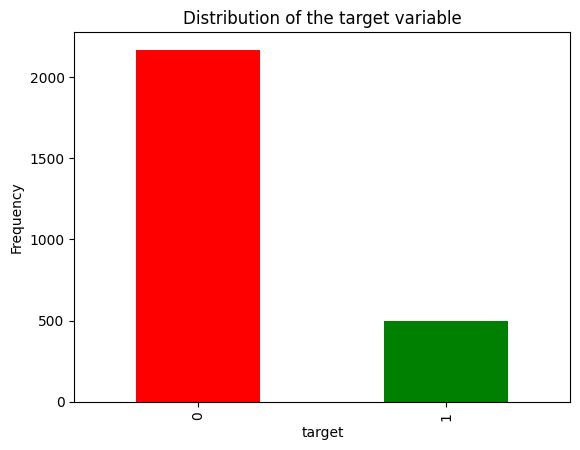

In [55]:
#Distribution of the target variable using rent colour label
df['target'].value_counts().plot(kind = 'bar', color = ['red', 'green'])
plt.title('Distribution of the target variable')
plt.xlabel('target')
plt.ylabel('Frequency')
plt.show()



### The visualization of the target variable's distribution depicts a non-normal pattern, revealing a right-skewed curve with a prevalence of lower values. This skewness suggests that the majority of data points are concentrated towards the lower end of the distribution, indicating potential limitations such as a lower threshold boundary or influential outliers. While the distribution exhibits smooth continuity without evident gaps or clusters, its width signifies considerable variability in the target variable's values, hinting at a challenging predictability landscape. This skewed distribution could impact the choice of machine learning algorithms, necessitating potential transformations before model training to mitigate the effects of skewness on certain algorithms, particularly those sensitive to non-normal distributions.

### The overall smoothness and absence of major outliers within the distribution contribute to a well-behaved dataset. However, the right skewness underscores the difficulty in predicting the target variable accurately. Despite the non-normal distribution, the absence of significant anomalies or clusters within the data implies a relatively stable and coherent dataset, albeit one that may present challenges in predicting higher values due to its skewness. Understanding the implications of this skewness on the choice of algorithms and considering potential transformations are key steps to enhance the predictive capacity of machine learning models on this dataset.

### Classification models that can be considered for a dataset with a skewed target variable distribution:

- Logistic Regression
- Random Forest
- Gradient Boosting Models (XGBoost, LightGBM, CatBoost)
- Support Vector Machines (SVM)
- Neural Networks (Deep Learning)

In [161]:
#save this dataset in a csv file
df.to_csv('C:/Users/DONKAMS/Downloads/Project_STA2017/NigeriaAutoInsurance_Vehicle_cleaned.csv', index = False)